### Autoencoder

###### Following this [url](https://blog.keras.io/building-autoencoders-in-keras.html)

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
encoding_dim = 32

input_img = Input(shape=(784,))

# encoded in the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoded is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps the input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

#create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
(x_train, _), (x_test, _) = mnist.load_data() 

In [6]:
#normalize and flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
tensorboard = TensorBoard(log_dir="./../TBlogs/")
autoencoder.fit(x_train, x_train, epochs = 50, batch_size=256, shuffle=True, )

Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.3580
Epoch 2/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.2669
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2476
Epoch 4/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.2256
Epoch 5/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.2092
Epoch 6/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1978
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1891
Epoch 8/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1820
Epoch 9/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1759
Epoch 10/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1707
Epoch 11/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1661
Epoch 12/50
60000/60000 [===========================

In [14]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [23]:
def display_result(autoencoder, x_test):
    
    decoded_imgs = autoencoder.predict(x_test)
    n=10
    plt.figure(figsize=(20,4))

    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

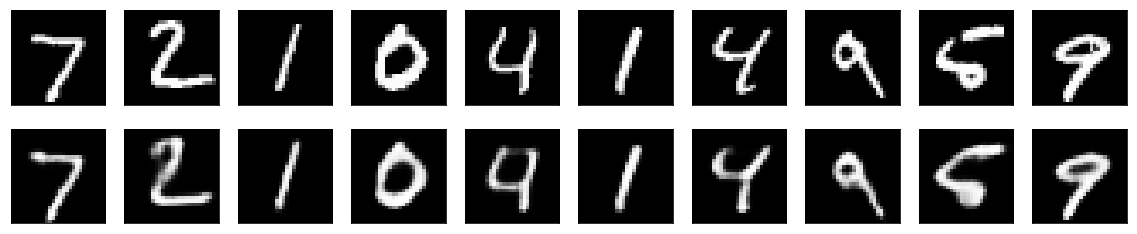

In [25]:
display_result(autoencoder, x_test)

###### Adding a sparsity constraint on the encoded representations

In [10]:
from keras import regularizers

encoded = Dense(encoding_dim, activation = 'relu',
                activity_regularizer = regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
tensorboard = TensorBoard(log_dir="./../TBlogs/")
autoencoder.fit(x_train, x_train, epochs = 50, batch_size=256, shuffle=True, )

Epoch 1/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.6725
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.6284
Epoch 3/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.5916
Epoch 4/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.5598
Epoch 5/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.5323
Epoch 6/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.5084
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4875
Epoch 8/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4692
Epoch 9/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4531
Epoch 10/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.4388
Epoch 11/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4262
Epoch 12/50
60000/60000 [===========================

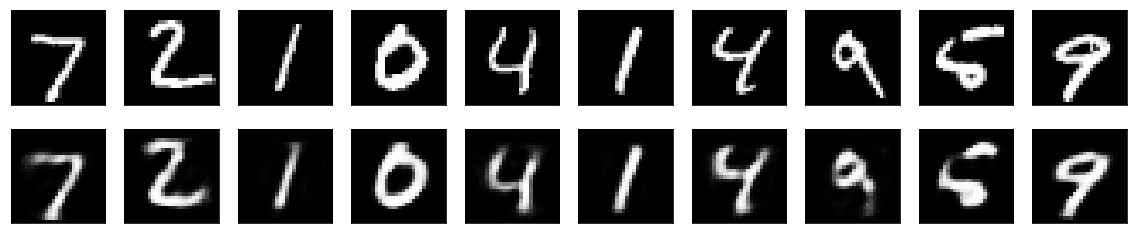

In [15]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
display_result(encoded_imgs=encoded_imgs, decoded_imgs=decoded_imgs)

### Deep autoencoder

In [16]:
input_imt = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)

In [17]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
               epochs=100,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.5527 - val_loss: 0.5157
Epoch 2/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.4248 - val_loss: 0.3897
Epoch 3/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3730 - val_loss: 0.3631
Epoch 4/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3519 - val_loss: 0.3309
Epoch 5/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3258 - val_loss: 0.3199
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3072 - val_loss: 0.3080
Epoch 7/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2869 - val_loss: 0.2760
Epoch 8/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2775 - val_loss: 0.2738
Epoch 9/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2728 - val_loss: 0.2

60000/60000 [==============================] - 1s 19us/step - loss: 0.1417 - val_loss: 0.1375
Epoch 78/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1405 - val_loss: 0.1343
Epoch 79/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1402 - val_loss: 0.1764
Epoch 80/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1392 - val_loss: 0.1327
Epoch 81/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1379 - val_loss: 0.1335
Epoch 82/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1418 - val_loss: 0.1343
Epoch 83/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1381 - val_loss: 0.1368
Epoch 84/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1385 - val_loss: 0.1364
Epoch 85/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1389 - val_loss: 0.1351
Epoch 86/100
60000/60000 [========================

In [26]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
display_result(autoencoder, x_test)

ValueError: Error when checking input: expected input_1 to have 2 dimensions, but got array with shape (10000, 28, 28, 1)

### Convolutional autoencoder

In [27]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [28]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [30]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='./../TBlogs/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2134 - val_loss: 0.1720
Epoch 2/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1554 - val_loss: 0.1537
Epoch 3/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1398 - val_loss: 0.1336
Epoch 4/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1314 - val_loss: 0.1257
Epoch 5/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1258 - val_loss: 0.1213
Epoch 6/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1218 - val_loss: 0.1188
Epoch 7/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1186 - val_loss: 0.1163
Epoch 8/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1162 - val_loss: 0.1153
Epoch 9/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1143 - val_loss: 0.1126
Epoch

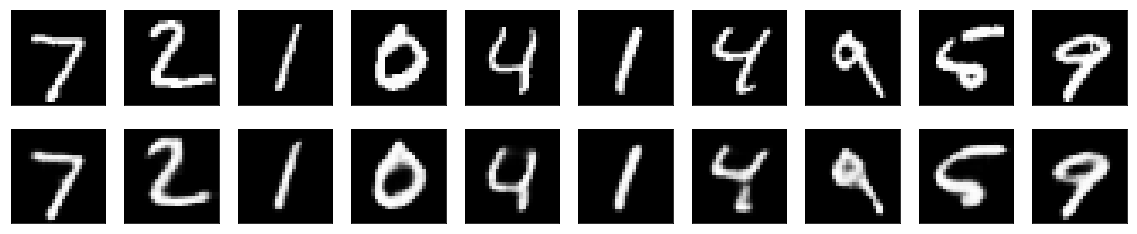

In [31]:
display_result(autoencoder, x_test)

### Application to image denoising

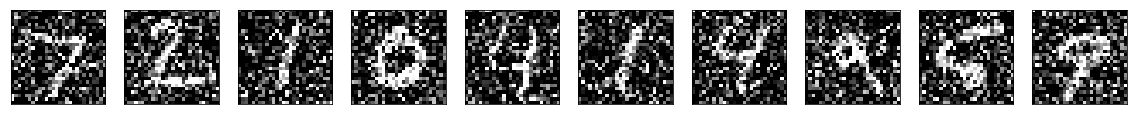

In [36]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy , 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [37]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [38]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.1737 - val_loss: 0.1277
Epoch 2/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1186 - val_loss: 0.1134
Epoch 3/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1115 - val_loss: 0.1089
Epoch 4/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.1078 - val_loss: 0.1075
Epoch 5/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1055 - val_loss: 0.1026
Epoch 6/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1040 - val_loss: 0.1025
Epoch 7/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1027 - val_loss: 0.1014
Epoch 8/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1021 - val_loss: 0.0999
Epoch 9/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1014 - val_loss: 0.1

60000/60000 [==============================] - 5s 84us/step - loss: 0.0944 - val_loss: 0.0941
Epoch 78/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0944 - val_loss: 0.0941
Epoch 79/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0944 - val_loss: 0.0939
Epoch 80/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0943 - val_loss: 0.0937
Epoch 81/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0943 - val_loss: 0.0949
Epoch 82/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0943 - val_loss: 0.0944
Epoch 83/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0943 - val_loss: 0.0938
Epoch 84/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0942 - val_loss: 0.0941
Epoch 85/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0942 - val_loss: 0.0940
Epoch 86/100
60000/60000 [========================

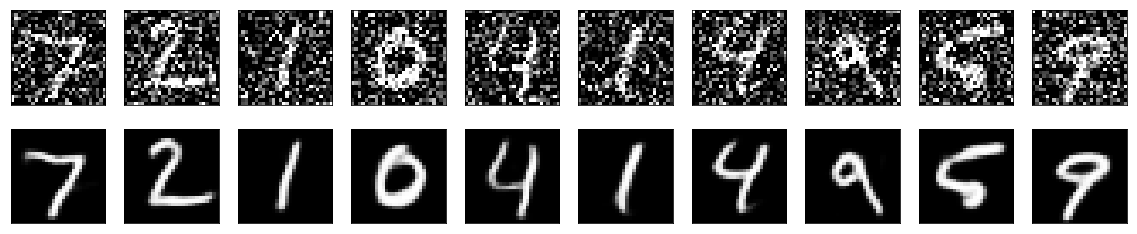

In [40]:
display_result(autoencoder, x_test_noisy)